In [1]:
# importing relevant libraries for reading and visualising data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
#reading the csv file
df = pd.read_csv('911.csv')
df.info()
df.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [6]:
#number of unique title codes
df['title'].nunique()

110

In [7]:
#top 5 town for 911 calls
df['twp'].value_counts().head(5)

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

In [11]:
#creating a new feature in the data frame from title column extracting the reason for the call
df['reason'] = df['title'].apply(lambda x: x.split(":")[0])
df.head(5)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS


In [12]:
#the reason for most of the calls
df['reason'].value_counts().head()

EMS        48877
Traffic    35695
Fire       14920
Name: reason, dtype: int64

C:\Users\Arsene\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='reason', ylabel='count'>

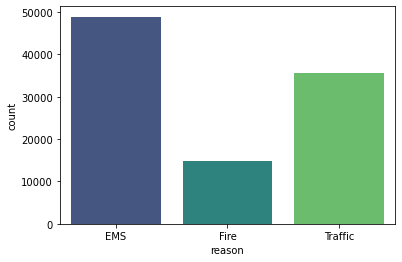

In [13]:
#creasting a countplot by reason of the number of calls
sns.countplot(df['reason'], palette = 'viridis')

In [21]:
#transformin the timestamp column to datetime obj
type(df['timeStamp'].iloc[0])
df['timeStamp'] = pd.to_datetime(df['timeStamp'])
df['timeStamp'].head()


0   2015-12-10 17:40:00
1   2015-12-10 17:40:00
2   2015-12-10 17:40:00
3   2015-12-10 17:40:01
4   2015-12-10 17:40:01
Name: timeStamp, dtype: datetime64[ns]

In [61]:
#creating new columns based on timeStamp
df['date'] = df['timeStamp'].apply(lambda t: t.date())
df['hour'] = df['timeStamp'].apply(lambda t: t.hour)
df['month'] = df['timeStamp'].apply(lambda t: t.month)
df['dayofweek'] = df['timeStamp'].apply(lambda t: t.dayofweek)
df['date'].head()

0    2015-12-10
1    2015-12-10
2    2015-12-10
3    2015-12-10
4    2015-12-10
Name: date, dtype: object

In [37]:
#mapping day of week to a string
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df['dayofweek'] = df['dayofweek'].map(dmap)
df['dayofweek'].head()

0    Thu
1    Thu
2    Thu
3    Thu
4    Thu
Name: dayofweek, dtype: object

C:\Users\Arsene\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


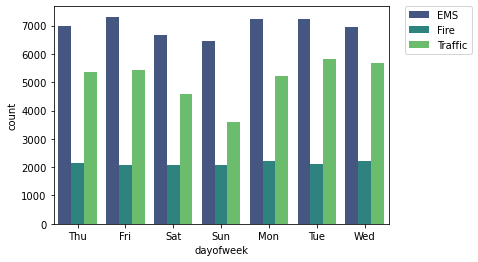

In [45]:
#plotting dayofweek based off reason col
sns.countplot(df['dayofweek'], palette='viridis', hue=df['reason'])
plt.legend(loc = 'best', bbox_to_anchor = (1.05,1), borderaxespad = 0.) #placing the legend outside 



C:\Users\Arsene\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


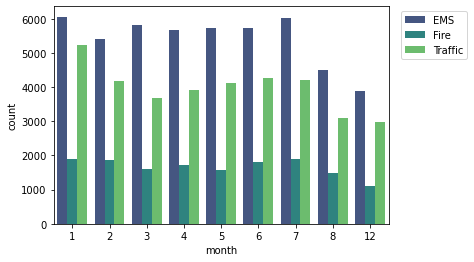

In [51]:
#plotting reason based on month
sns.countplot(df['month'], palette= 'viridis', hue = df['reason'])
plt.legend(bbox_to_anchor = (1.25,1), loc = 'best')

In [55]:
#from the plot it is obvious that we have some missing month,
by_month = df.groupby('month').count()
by_month.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,hour,dayofweek
month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423


<AxesSubplot:xlabel='month'>

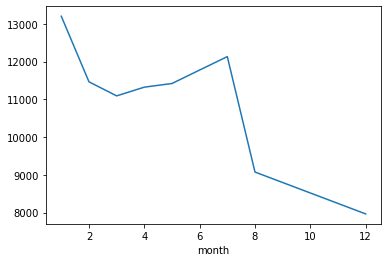

In [57]:
#ploting number of calls for each month 
by_month['twp'].plot()

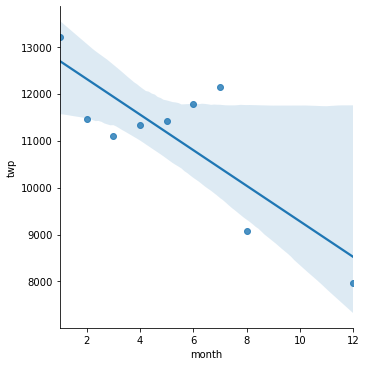

In [58]:
#creating a linear fit to number of calls per month using lmplot
sns.lmplot(x = 'month', y = 'twp', data = by_month.reset_index())

In [62]:
#grouping the calls by date
by_date = df.groupby('date').count()
by_date.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,hour,month,dayofweek
date,,,,,,,,,,,,,
2015-12-10,115,115,115,100,115,115,115,113,115,115,115,115,115
2015-12-11,396,396,396,333,396,396,395,391,396,396,396,396,396
2015-12-12,403,403,403,333,403,403,403,401,403,403,403,403,403
2015-12-13,319,319,319,280,319,319,319,317,319,319,319,319,319
2015-12-14,447,447,447,387,447,447,446,445,447,447,447,447,447


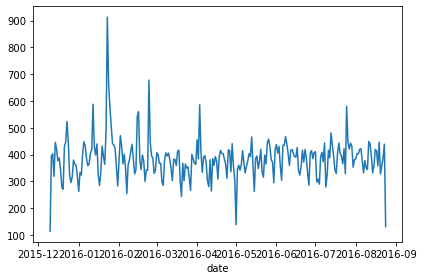

In [67]:
#plotting the number of calls by date
by_date['twp'].plot()
plt.tight_layout()

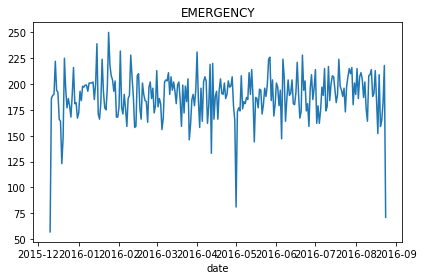

In [70]:
#creating seperate countplots for different reasons by date
df[df['reason'] == 'EMS'].groupby('date').count()['twp'].plot()
plt.title('EMERGENCY')
plt.tight_layout()


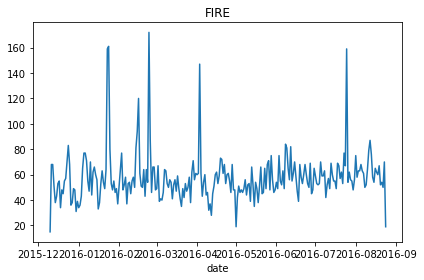

In [71]:
df[df['reason'] == 'Fire'].groupby('date').count()['twp'].plot()
plt.title('FIRE')
plt.tight_layout()

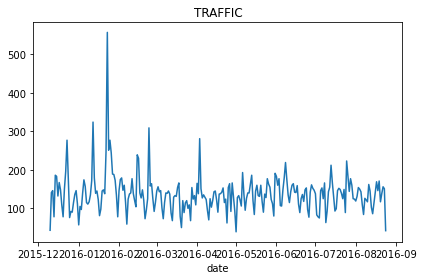

In [73]:
df[df['reason'] == 'Traffic'].groupby('date').count()['twp'].plot()
plt.title('TRAFFIC')
plt.tight_layout()

In [85]:
#creating heatmaps
weekdayhour = df.groupby(by =['dayofweek','hour']).count()['reason'].unstack()
weekdayhour.head()


hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
dayofweek,,,,,,,,,,,,,,,,,,,,,
0,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
1,269,240,186,170,209,239,415,655,889,880,...,943,938,1026,1019,905,731,647,571,462,274
2,250,216,189,209,156,255,410,701,875,808,...,904,867,990,1037,894,686,668,575,490,335
3,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354
4,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474


<AxesSubplot:xlabel='hour', ylabel='dayofweek'>

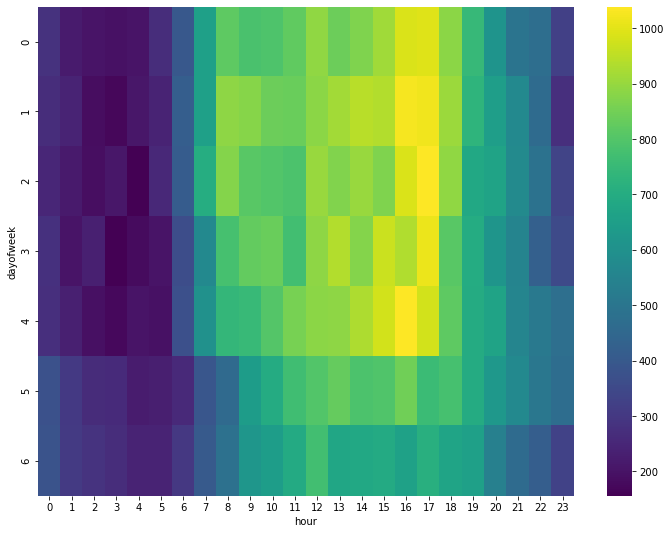

In [86]:
plt.figure(figsize=(12,9))
sns.heatmap(weekdayhour,cmap='viridis')

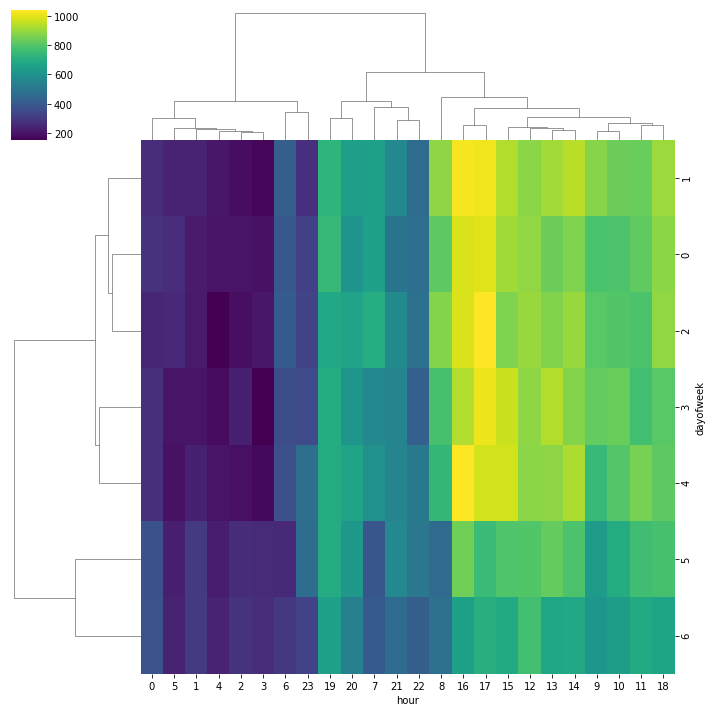

In [87]:
#creating a cluster map to see at mainly waht hours and which days the calls were made to 911
sns.clustermap(weekdayhour,cmap='viridis')

In [92]:
#lets explore the same problem for each month and  weekdays
month_day = df.groupby(['month','dayofweek']).count()['reason'].unstack()
month_day.head()

dayofweek,0,1,2,3,4,5,6
month,,,,,,,
1,1727,1973,1700,1584,1970,2291,1960
2,1964,1753,1903,1596,1581,1441,1229
3,1535,1884,1889,1900,1525,1266,1102
4,1598,1430,1517,1601,1958,1734,1488
5,1779,1918,1538,1590,1730,1444,1424


<AxesSubplot:xlabel='dayofweek', ylabel='month'>

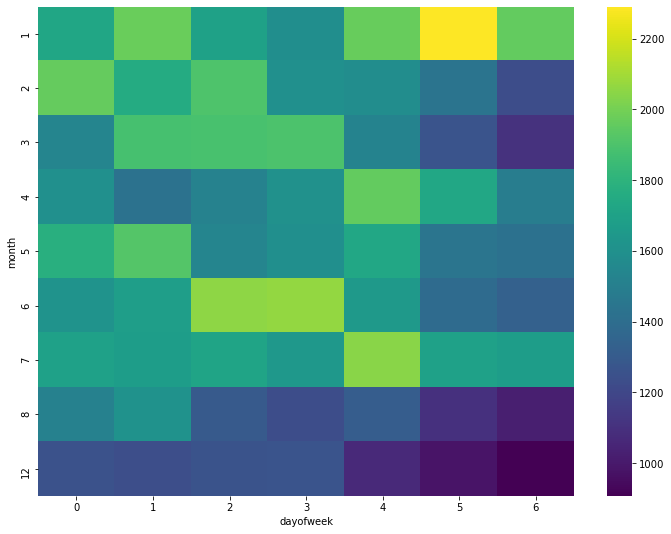

In [93]:
#creating the heatmap
plt.figure(figsize=(12,9))
sns.heatmap(month_day,cmap='viridis')

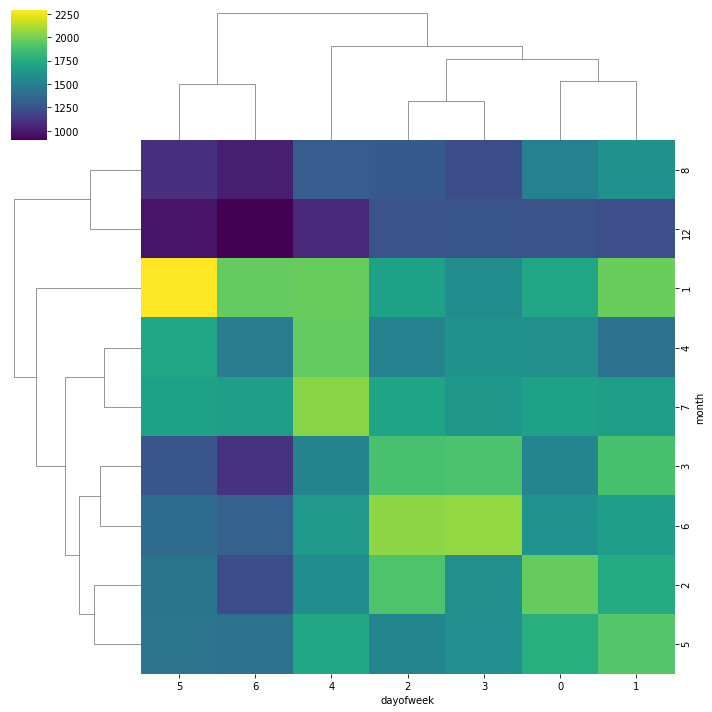

In [94]:
sns.clustermap(month_day, cmap='viridis')